## Первая часть
Дан набор предложений, скопированных с Википедии. Каждое из них имеет "кошачью тему" в одном из трех смыслов:

кошки (животные)
UNIX-утилита cat для вывода содержимого файлов
версии операционной системы OS X, названные в честь семейства кошачьих
Ваша задача — найти два предложения, которые ближе всего по смыслу к расположенному в самой первой строке. В качестве меры близости по смыслу мы будем использовать косинусное расстояние.

In [34]:
import numpy as np
import re
with open('/Users/gosa/Downloads/sentences.txt') as f:
        sentences = f.readlines()
for i in range(len(sentences)):
    sentences[i] = sentences[i].lower()
    sentences[i] = sentences[i][0:len(sentences[i])-1]
    sentences[i] = re.split('[^a-z]', sentences[i])
    sentences[i] = [x for x in sentences[i] if x]

In [2]:
set_of_unique_words = set()
for sentence in sentences:
    set_of_unique_words = set_of_unique_words | set(sentence)

In [5]:
matrix = np.zeros(shape=(len(sentences),len(set_of_unique_words)))
matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
from collections import Counter
def unique(list):
    cnt = Counter()
    for word in list:
        cnt[word] += 1
    return cnt

In [14]:
dict_of_unique_words = {}
for item in enumerate(set_of_unique_words):
    dict_of_unique_words[item[1]] = item[0]
dict_of_unique_words['comparison']

0

In [26]:
#Заполняем матрицу
for i in range(len(sentences)):
    d = unique(sentences[i])
    for word in sentences[i]:
        matrix[i][dict_of_unique_words[word]] = d[word]

In [30]:
from scipy.spatial import distance
dist = {}
for number in range(len(matrix)):
    dist[number] = distance.cosine(matrix[0], matrix[number])
print (dist)

{0: 0.0, 1: 0.9527544408738466, 2: 0.8644738145642124, 3: 0.8951715163278082, 4: 0.7770887149698589, 5: 0.9402385695332803, 6: 0.7327387580875756, 7: 0.9258750683338899, 8: 0.8842724875284311, 9: 0.9055088817476932, 10: 0.8328165362273942, 11: 0.8804771390665607, 12: 0.8396432548525454, 13: 0.8703592552895671, 14: 0.8740118423302576, 15: 0.9442721787424647, 16: 0.8406361854220809, 17: 0.956644501523794, 18: 0.9442721787424647, 19: 0.8885443574849294, 20: 0.8427572744917122, 21: 0.8250364469440588}


In [31]:
sorted_values = sorted(dist.values()) # Sort the values
sorted_dict = {}

for i in sorted_values:
    for k in dist.keys():
        if dist[k] == i:
            sorted_dict[k] = dist[k]
            break
print(sorted_dict)

{0: 0.0, 6: 0.7327387580875756, 4: 0.7770887149698589, 21: 0.8250364469440588, 10: 0.8328165362273942, 12: 0.8396432548525454, 16: 0.8406361854220809, 20: 0.8427572744917122, 2: 0.8644738145642124, 13: 0.8703592552895671, 14: 0.8740118423302576, 11: 0.8804771390665607, 8: 0.8842724875284311, 19: 0.8885443574849294, 3: 0.8951715163278082, 9: 0.9055088817476932, 7: 0.9258750683338899, 5: 0.9402385695332803, 15: 0.9442721787424647, 1: 0.9527544408738466, 17: 0.956644501523794}


In [33]:
with open('/Users/gosa/Downloads/sentences.txt') as f:
        raw_sentences = f.readlines()
print(raw_sentences[6], raw_sentences[4], raw_sentences[21], raw_sentences[0])

Domestic cats are similar in size to the other members of the genus Felis, typically weighing between 4 and 5 kg (8.8 and 11.0 lb).
 In one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin.
 The fifth major update to Mac OS X, Leopard, contains such a mountain of features - more than 300 by Apple's count.
 In comparison to dogs, cats have not undergone major changes during the domestication process.



## Вторая часть
Рассмотрим сложную математическую функцию на отрезке [1, 15]:

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)


Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

In [51]:
# Линейное приближение
from math import sin, exp
def f(x:float):
    return(np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2))

In [52]:
A = np.array([[1, 1], [15, 1]])
b = np.array([f(1), f(15)])
x = np.linalg.solve(A, b)
print ("Матрица A:\n", A)
print ("Вектор b:\n", b)
print ("Решение системы:\n", x)

Матрица A:
 [[ 1  1]
 [15  1]]
Вектор b:
 [3.25221687 0.63522142]
Решение системы:
 [-0.18692825  3.43914511]


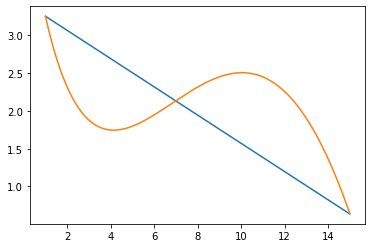

In [53]:
%matplotlib inline
from matplotlib import pylab as plt

def linear(x:float):
    return(-0.18692825 * x + 3.43914511)


x = np.arange(1, 15, 0.01)
y_1 = linear(x)
y_2 = f(x)

plt.plot(x, y_1)
plt.plot(x, y_2)
plt.show()

In [54]:
# Квадратичное приближение
A = np.array([[1, 1, 1], [8, 8, 1], [225, 15, 1]])
b = np.array([f(1), f(8), f(15)])
x = np.linalg.solve(A, b)
print ("Матрица A:\n", A)
print ("Вектор b:\n", b)
print ("Решение системы:\n", x)

Матрица A:
 [[  1   1   1]
 [  8   8   1]
 [225  15   1]]
Вектор b:
 [3.25221687 2.31617016 0.63522142]
Решение системы:
 [-0.00354715 -0.13017381  3.38593782]


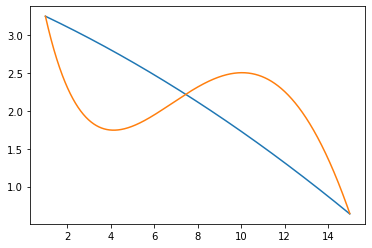

In [55]:
def quadratic(x:float):
    return(-0.00354715 * x**2 -0.13017381*x + 3.38593782)


x = np.arange(1, 15, 0.01)
y_1 = quadratic(x)
y_2 = f(x)

plt.plot(x, y_1)
plt.plot(x, y_2)
plt.show()

In [64]:
# Кубическое приближение
A = np.array([[1, 1, 1, 1], [4.0**3, 4.0**2, 4.0, 1], 
             [10.0**3, 10.0**2, 10.0**1, 1], [15.0**3, 15.0**2, 15.0**1, 1]])
b = np.array([f(1), f(4), f(10), f(15)])
x = np.linalg.solve(A, b)
print ("Матрица A:\n", A)
print ("Вектор b:\n", b)
print ("Решение системы:\n", x)

Матрица A:
 [[1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [6.400e+01 1.600e+01 4.000e+00 1.000e+00]
 [1.000e+03 1.000e+02 1.000e+01 1.000e+00]
 [3.375e+03 2.250e+02 1.500e+01 1.000e+00]]
Вектор b:
 [3.25221687 1.74684595 2.50541641 0.63522142]
Решение системы:
 [-0.00823565  0.19333685 -1.29552587  4.36264154]


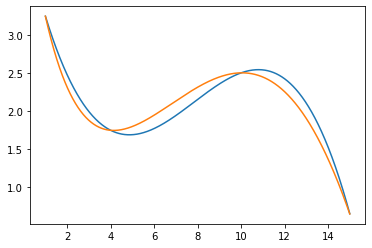

In [61]:
def qubic(x:float):
    return(-0.00823565*x**3 + 0.19333685*x**2 -1.29552587*x + 4.36264154)


x = np.arange(1, 15, 0.01)
y_1 = qubic(x)
y_2 = f(x)

plt.plot(x, y_1)
plt.plot(x, y_2)
plt.show()